In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [6]:
from talib import RSI, EMA, SMA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [7]:
import GetOldTweets3 as got

In [ ]:
from textblob import TextBlob
#python -m textblob.download_corpora

In [23]:
import re

In [9]:
df=pd.read_csv("forex.csv", index_col=0, parse_dates=True)

In [10]:
df.head()


,open,high,low,close,volume
date,,,,,
2011-03-29,1.4086,1.4148,1.4047,1.4113,64044
2011-03-30,1.4113,1.4146,1.4052,1.4126,70281
2011-03-31,1.4127,1.4232,1.4116,1.4174,73492
2011-04-01,1.4173,1.4245,1.4061,1.4234,70943
2011-04-04,1.4231,1.4268,1.4192,1.4218,61094


In [11]:
df.columns=[["open","high","low", "close", "volume"]]

In [12]:
df=df.dropna()
df.head()
df.shape

(2048, 5)

In [13]:
ema_period=5
rsi_period=10

In [14]:
df["ema"]=df["close"].apply(lambda row: EMA(row,timeperiod=ema_period))

In [15]:
df["rsi"]=df["close"].apply(lambda row: RSI(row,timeperiod=rsi_period))

In [16]:
df.head(20)

,open,high,low,close,volume,ema,rsi
date,,,,,,,
2011-03-29,1.4086,1.4148,1.4047,1.4113,64044,NaN,NaN
2011-03-30,1.4113,1.4146,1.4052,1.4126,70281,NaN,NaN
2011-03-31,1.4127,1.4232,1.4116,1.4174,73492,NaN,NaN
2011-04-01,1.4173,1.4245,1.4061,1.4234,70943,NaN,NaN
2011-04-04,1.4231,1.4268,1.4192,1.4218,61094,1.417300,NaN
2011-04-05,1.4218,1.4245,1.4151,1.4218,62421,1.418800,NaN
2011-04-06,1.4218,1.4348,1.4217,1.4331,67438,1.423567,NaN
2011-04-07,1.4330,1.4336,1.4243,1.4304,71548,1.425844,NaN
2011-04-08,1.4303,1.4487,1.4291,1.4482,69625,1.433296,NaN


In [17]:
df.dropna(inplace=True)

In [18]:
df["close_nextday"]=df.close.shift(-1)

In [19]:
df.head(20)

,open,high,low,close,volume,ema,rsi,close_nextday
date,,,,,,,,
2011-04-12,1.4434,1.4518,1.4377,1.4478,78914,1.440332,83.121597,1.4440
2011-04-13,1.4478,1.4519,1.4413,1.4440,72407,1.441554,77.205469,1.4486
2011-04-14,1.4440,1.4514,1.4365,1.4486,73809,1.443903,79.196976,1.4429
2011-04-15,1.4486,1.4503,1.4390,1.4429,67446,1.443569,70.693348,1.4227
2011-04-18,1.4416,1.4420,1.4157,1.4227,78429,1.436612,49.686256,1.4331
2011-04-19,1.4227,1.4352,1.4205,1.4331,73380,1.435442,56.996482,1.4521
2011-04-20,1.4331,1.4544,1.4328,1.4521,81284,1.440994,66.790908,1.4550
2011-04-21,1.4521,1.4648,1.4505,1.4550,73069,1.445663,68.025930,1.4560
2011-04-22,1.4550,1.4587,1.4534,1.4560,34293,1.449109,68.475120,1.4578


## Getting tweets

In [70]:
max_tweets=10

In [71]:
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('EUR/USD')\
                                           .setSince("2019-01-01")\
                                           .setUntil("2019-05-01")\
                                           .setMaxTweets(max_tweets)\
                                           .setTopTweets(True)

In [72]:
tweets_csv = open('tweets.csv', 'w')

In [73]:
csvWriter = csv.writer(tweets_csv, delimiter=',')

In [74]:
csvWriter.writerow(['date', 'tweet_id', 'tweet_username','tweet_text'])

41

In [75]:
for i in range(max_tweets):
    tweet = got.manager.TweetManager.getTweets(tweetCriteria)[i]
    csvWriter.writerow([tweet.date,tweet.id, tweet.username, tweet.text.encode('utf-8')])

In [76]:
tweets_csv.close()

In [26]:
tweets_df=pd.read_csv("tweets.csv", index_col='date', parse_dates=True)

In [27]:
tweets_df.head()

,tweet_id,tweet_username,tweet_text
date,,,
2019-04-30 19:49:35+00:00,1123313468394954752,waltervannelli,b'All set for the month! #Eur/usd P&L daily -5...
2019-04-30 19:14:41+00:00,1123304685581086720,waltervannelli,b'#Eur/usd sold 2.5 lts a 1.1222. Short 12.5 l...
2019-04-30 15:07:38+00:00,1123242511080861697,waltervannelli,b'#Eur/usd moves down driven by eur/jpy still ...
2019-04-30 15:01:18+00:00,1123240919187300353,salahuddin2004,b'\xf0\x9d\x95\xae\xf0\x9d\x96\x94\xf0\x9d\x96...
2019-04-30 14:29:28+00:00,1123232907311685633,ChrisFxTrader77,b'I have seen this kind of false move happen m...


## Clearing tweets and getting sentiment

In [28]:
tweets_df['tweet_text_clean']=tweets_df['tweet_text'].apply(lambda row: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", row).split()))

In [29]:
tweets_df.head()

,tweet_id,tweet_username,tweet_text,tweet_text_clean
date,,,,
2019-04-30 19:49:35+00:00,1123313468394954752,waltervannelli,b'All set for the month! #Eur/usd P&L daily -5...,b All set for the month Eur usd P L daily 5 pi...
2019-04-30 19:14:41+00:00,1123304685581086720,waltervannelli,b'#Eur/usd sold 2.5 lts a 1.1222. Short 12.5 l...,b Eur usd sold 2 5 lts a 1 1222 Short 12 5 lot...
2019-04-30 15:07:38+00:00,1123242511080861697,waltervannelli,b'#Eur/usd moves down driven by eur/jpy still ...,b Eur usd moves down driven by eur jpy still s...
2019-04-30 15:01:18+00:00,1123240919187300353,salahuddin2004,b'\xf0\x9d\x95\xae\xf0\x9d\x96\x94\xf0\x9d\x96...,b xf0 x9d x95 xae xf0 x9d x96 x94 xf0 x9d x96 ...
2019-04-30 14:29:28+00:00,1123232907311685633,ChrisFxTrader77,b'I have seen this kind of false move happen m...,b I have seen this kind of false move happen m...


In [31]:
tweets_df['tweet_sentiment']=tweets_df['tweet_text_clean'].apply(lambda row:1 if TextBlob(row).sentiment.polarity>0 else 0)

In [32]:
tweets_df.head()

,tweet_id,tweet_username,tweet_text,tweet_text_clean,tweet_sentiment
date,,,,,
2019-04-30 19:49:35+00:00,1123313468394954752,waltervannelli,b'All set for the month! #Eur/usd P&L daily -5...,b All set for the month Eur usd P L daily 5 pi...,1
2019-04-30 19:14:41+00:00,1123304685581086720,waltervannelli,b'#Eur/usd sold 2.5 lts a 1.1222. Short 12.5 l...,b Eur usd sold 2 5 lts a 1 1222 Short 12 5 lot...,0
2019-04-30 15:07:38+00:00,1123242511080861697,waltervannelli,b'#Eur/usd moves down driven by eur/jpy still ...,b Eur usd moves down driven by eur jpy still s...,0
2019-04-30 15:01:18+00:00,1123240919187300353,salahuddin2004,b'\xf0\x9d\x95\xae\xf0\x9d\x96\x94\xf0\x9d\x96...,b xf0 x9d x95 xae xf0 x9d x96 x94 xf0 x9d x96 ...,0
2019-04-30 14:29:28+00:00,1123232907311685633,ChrisFxTrader77,b'I have seen this kind of false move happen m...,b I have seen this kind of false move happen m...,1


## Creating the RandomForestRegressor

In [19]:
x=df.iloc[:,0:7].values # selected features

In [20]:
y=df.iloc[:,7].values# labels

In [21]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3)

In [22]:
model=RandomForestRegressor(n_estimators=20, max_features="sqrt", max_depth=10,random_state=1)

In [23]:
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [24]:
model.feature_importances_

array([2.84005183e-01, 7.32907683e-02, 2.71914031e-01, 1.81793988e-01,
       2.26221936e-02, 1.66124429e-01, 2.49407000e-04])

In [25]:
model.score(x_train, y_train)

0.9999204465375744

In [26]:
model.score(x_test, y_test)

0.9995764565794392

In [27]:
predictions=model.predict(x_test)

In [34]:
points=range(y_test.shape[0])

In [35]:
print(points)

range(0, 612)


In [41]:
print(y_test.shape[0])

612


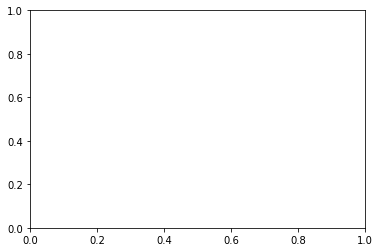

In [47]:
fig, ax1=plt.subplots()

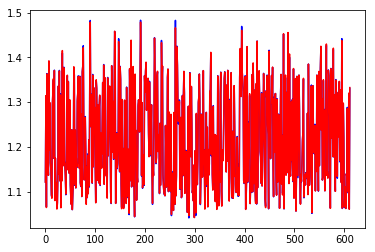

In [51]:
ax1=plt.plot(points, y_test, color='blue')
ax2=plt.plot(points, predictions, color='red')

In [50]:
plt.show()